### **CSCN8010**
#### **Practical Lab 2**
**Submitted by**

**Nikhil Shankar CS**

**9026254**

### **Introduction**

In this analysis we are going to use the dataset provided by scikit learn on diabetes and some parameters affecting the progresion after 1 year. The dataset has 10 features and a dependent variable which is given seperately as target values. By the end of this analysis we will try to come up with some models that can predict the disease progression after 1 year.

#### **Aim of the analysis**

- Find out which parameter has most impact on a persons disease progression after a year.
- Find out which model will best suite the dataset. Univariate, Multivariate, Decision Tree or kNN.
- Find out if polynomial regression helps in increasing predictability

In [71]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

diabetes = load_diabetes()
raw_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
target_column_name = 'First Year Progression'
raw_df[target_column_name] = diabetes.target

tsm_column_name = 'Total Serum Cholesterol'
ldl_column_name = 'LDL'
hdl_column_name = 'HDL'
tch_column_name = 'Total Cholesterol'
ltg_column_name = 'Triglycerides'
glu_column_name = 'Blood Glucose'
raw_df = raw_df.rename(columns={'s1':tsm_column_name, 's2': ldl_column_name, 
                        's3':hdl_column_name, 's4':tch_column_name
                        ,'s5':ltg_column_name, 's6':glu_column_name })
# Splitting the dataset into train test and validation set
t_df, test_df = train_test_split(raw_df, test_size=0.15, random_state=25)
df, validation_df = train_test_split(t_df, test_size=10/85, random_state=25)
print(f'Training set count : {len(df)}')
print(f'Test set count : {len(test_df)}')
print(f'Validation set count : {len(validation_df)}')



display(df.head())
display(validation_df.head())
display(test_df.head())


Training set count : 330
Test set count : 67
Validation set count : 45


,age,sex,bmi,bp,Total Serum Cholesterol,LDL,HDL,Total Cholesterol,Triglycerides,Blood Glucose,First Year Progression
123,0.005383,0.050680,0.034751,-0.001091,0.152538,0.198788,-0.061809,0.185234,0.015568,0.073480,84.0
382,0.048974,-0.044642,0.060618,-0.022885,-0.023584,-0.072712,-0.043401,-0.002592,0.104136,0.036201,132.0
171,-0.020045,-0.044642,-0.046085,-0.098627,-0.075870,-0.059873,-0.017629,-0.039493,-0.051404,-0.046641,74.0
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480,292.0
272,0.012648,-0.044642,0.006728,-0.056177,-0.075870,-0.066449,-0.021311,-0.037648,-0.018114,-0.092204,182.0


,age,sex,bmi,bp,Total Serum Cholesterol,LDL,HDL,Total Cholesterol,Triglycerides,Blood Glucose,First Year Progression
166,-0.056370,0.050680,-0.060097,-0.036656,-0.088254,-0.070833,-0.013948,-0.039493,-0.078140,-0.104630,70.0
46,-0.056370,-0.044642,-0.011595,-0.033213,-0.046975,-0.047660,0.004460,-0.039493,-0.007977,-0.088062,190.0
75,-0.009147,0.050680,-0.030996,-0.026328,-0.011201,-0.001001,-0.021311,-0.002592,0.006207,0.027917,42.0
241,0.030811,0.050680,-0.008362,0.004658,0.014942,0.027496,0.008142,-0.008127,-0.029526,0.056912,177.0
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215,101.0


,age,sex,bmi,bp,Total Serum Cholesterol,LDL,HDL,Total Cholesterol,Triglycerides,Blood Glucose,First Year Progression
405,0.048974,0.050680,0.123131,0.083844,-0.104765,-0.100895,-0.069172,-0.002592,0.036644,-0.030072,281.0
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362,233.0
95,-0.070900,-0.044642,-0.057941,-0.081413,-0.045599,-0.028871,-0.043401,-0.002592,0.001148,-0.005220,162.0
337,0.019913,0.050680,-0.012673,0.070072,-0.011201,0.007141,-0.039719,0.034309,0.005386,0.003064,91.0
338,-0.063635,-0.044642,-0.033151,-0.033213,0.001183,0.024051,-0.024993,-0.002592,-0.022517,-0.059067,214.0


#### **EDA**

In [72]:
# We are using seaborn to plot scatter plots
import seaborn as sns
# To eliminate warnings from appearing in ipynb
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore

warnings.filterwarnings('ignore')

# created a function for plotting scatter diagram which uses seaborn.
def plot_scatter_diagram(df, dependent_column_name):
    fig, axes = plt.subplots(4, int((len(df.columns)/4) + 1),figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        if col_name != dependent_column_name:
            sns.scatterplot(x=col_name, y=dependent_column_name, data=df, ax=axes[i%4, i//4])
    plt.tight_layout()
    plt.show()

def plot_histogram(df):
    fig,axes = plt.subplots(4, int(len(df.columns)//4)+1, figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        axes[i%4, i//4].hist(df[col_name], bins=100)
        axes[i%4, i//4].set_xlabel(col_name)
        axes[i%4, i//4].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_whisker(df):
    fig,axes = plt.subplots(4, int(len(df.columns)//4)+1, figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        axes[i%4, i//4].boxplot(df[col_name])
        axes[i%4, i//4].set_xlabel(col_name)
        axes[i%4, i//4].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### creating a new empty dataframe and then assigning the column and zscore directly worked.
### This code didnt work strangely. Need to find out why.
### z_scores = zscore(df[col_name])
### df_zscore = pd.DataFrame(z_scores, columns=['zscore'])
def zscore_scatter_with_outliers(df, z_score_outlier_abs_value):
    fig,axes = plt.subplots(4, int(len(df.columns)//4)+1, figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        df_zscore = pd.DataFrame()
        df_zscore['zscore'] = zscore(df[col_name])
        df_zscore_outlier = df_zscore[df_zscore['zscore'].abs() > z_score_outlier_abs_value]
        axes[i%4, i//4].scatter(df_zscore.index, df_zscore['zscore'], color='green')
        axes[i%4, i//4].set_title(col_name)
        if(len(df_zscore_outlier) != 0): 
            axes[i%4, i//4].scatter(df_zscore_outlier.index, df_zscore_outlier['zscore'], color='red')
    plt.tight_layout()
    plt.show()
    

In [104]:
df.describe()

,age,sex,bmi,bp,Total Serum Cholesterol,LDL,HDL,Total Cholesterol,Triglycerides,Blood Glucose,First Year Progression,Inv-HDL
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,0.002433,-0.000736,-0.000944,0.000033,0.000620,0.001117,0.001242,-0.000473,-0.001213,0.000341,149.127273,22.683306
std,0.046864,0.047585,0.046564,0.047098,0.046600,0.047557,0.048892,0.048097,0.045808,0.046592,77.104135,214.836491
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.000000,-344.491433
25%,-0.033667,-0.044642,-0.035307,-0.036656,-0.031840,-0.029419,-0.036038,-0.039493,-0.034522,-0.030072,83.000000,-30.906234
50%,0.005383,-0.044642,-0.006206,-0.005670,-0.004321,-0.003036,-0.006584,-0.002592,-0.003301,-0.001078,137.000000,-13.726092
75%,0.040800,0.050680,0.032326,0.035360,0.030078,0.030784,0.030232,0.034309,0.029137,0.027917,202.000000,28.764843
max,0.110727,0.050680,0.137143,0.132044,0.153914,0.198788,0.181179,0.185234,0.132376,0.135612,341.000000,1284.013523


##### **Insights**
- Disease progression 2nd quartile is 137 while mean is 149.12 suggesting that values are higher in 3rd and 4th quartile.

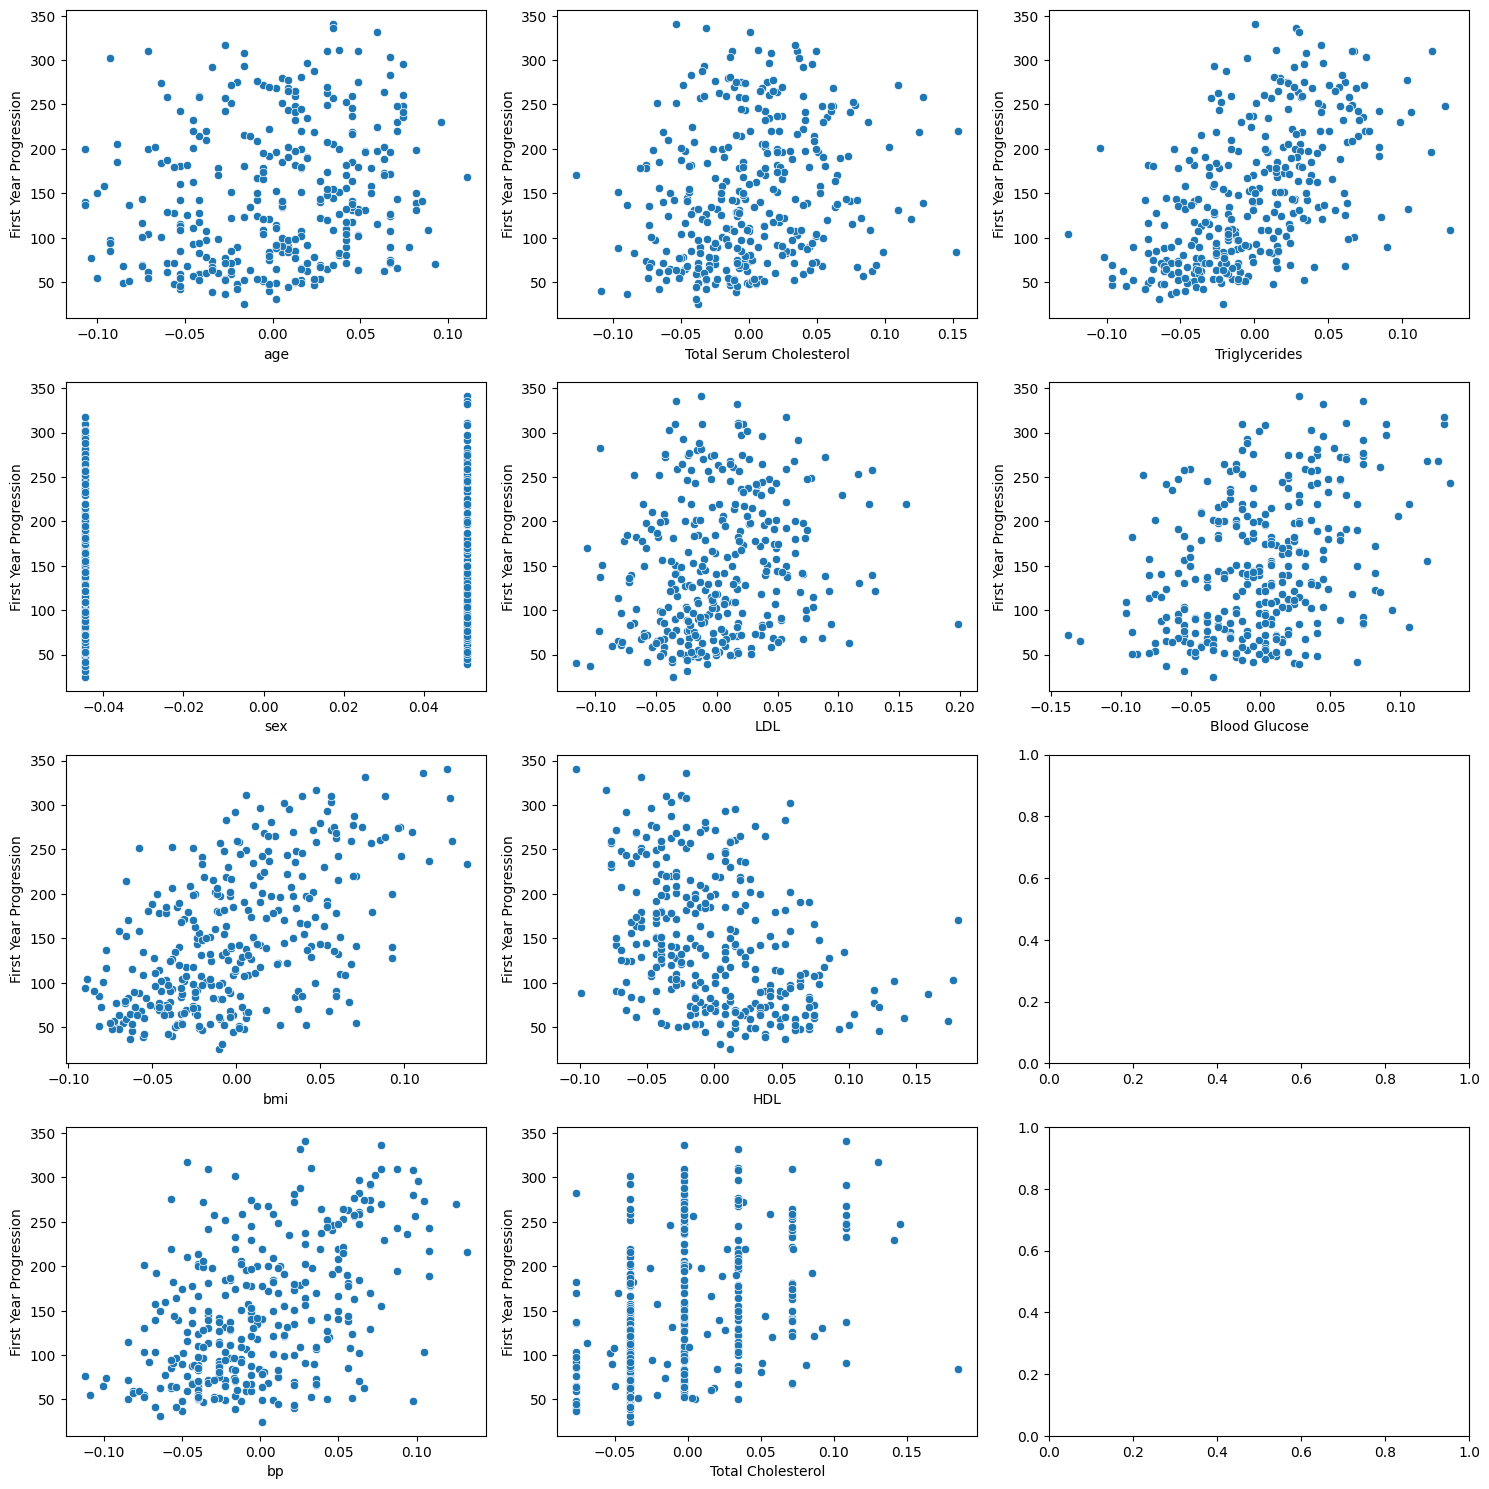

In [74]:
plot_scatter_diagram(df, target_column_name)

##### **Insights from scatter plot**

- Total Cholesterol scatter plot indicates the possibility of the datset being a merge of two datasets. One which gave continous values for total cholesterol and one which was capped or floored to 6 different levels. Correcting this is not under the scope of this analysis.
- From initial examination bp ( blood pressure), total cholesterol, bmi (body mass index), ldl, blood glucose and tri glycerides appears to have a positive linear relation with progression of disease.
- Total serum cholesterol and age doesn't appear to show any linear relation.
- HDL seems to have a inverse linear relation with progression of disease meaning when hdl goes up disease progression comes down.

##### **Histogram**


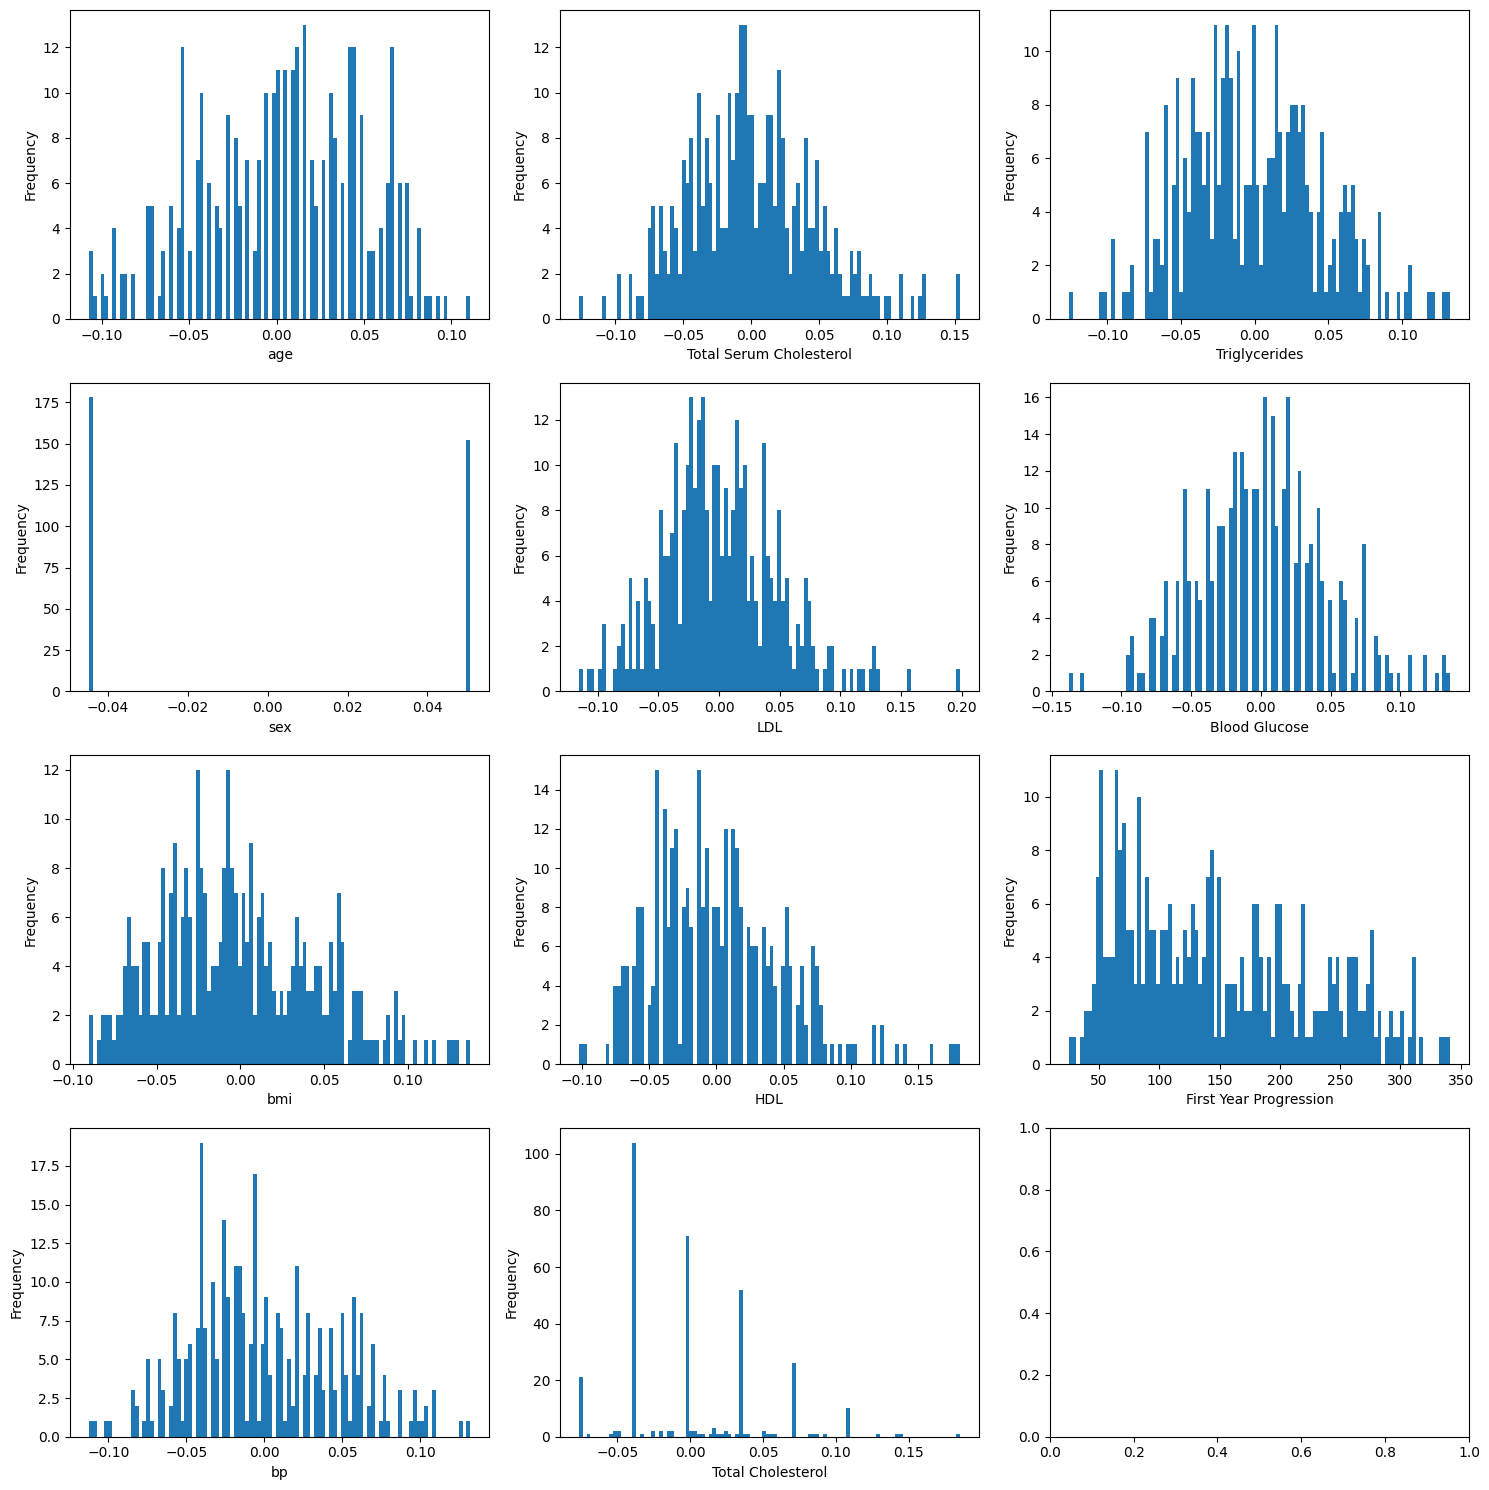

In [75]:
plot_histogram(df)

##### **Insights from Histogram**

- Histogram confirms our findings about Total Cholesterol. It has 6 distinct values in regular intervals suggesting an input that had 6 choices and an extra choice where the user can be more specific. From the frequency it can be noted that the users tend to use the 6 choices rather than opting to input the exact value. 
- For all parameters other than Total Cholesterol and age the data forms a bell curve suggesting normality. 

##### **Whisker Plot**

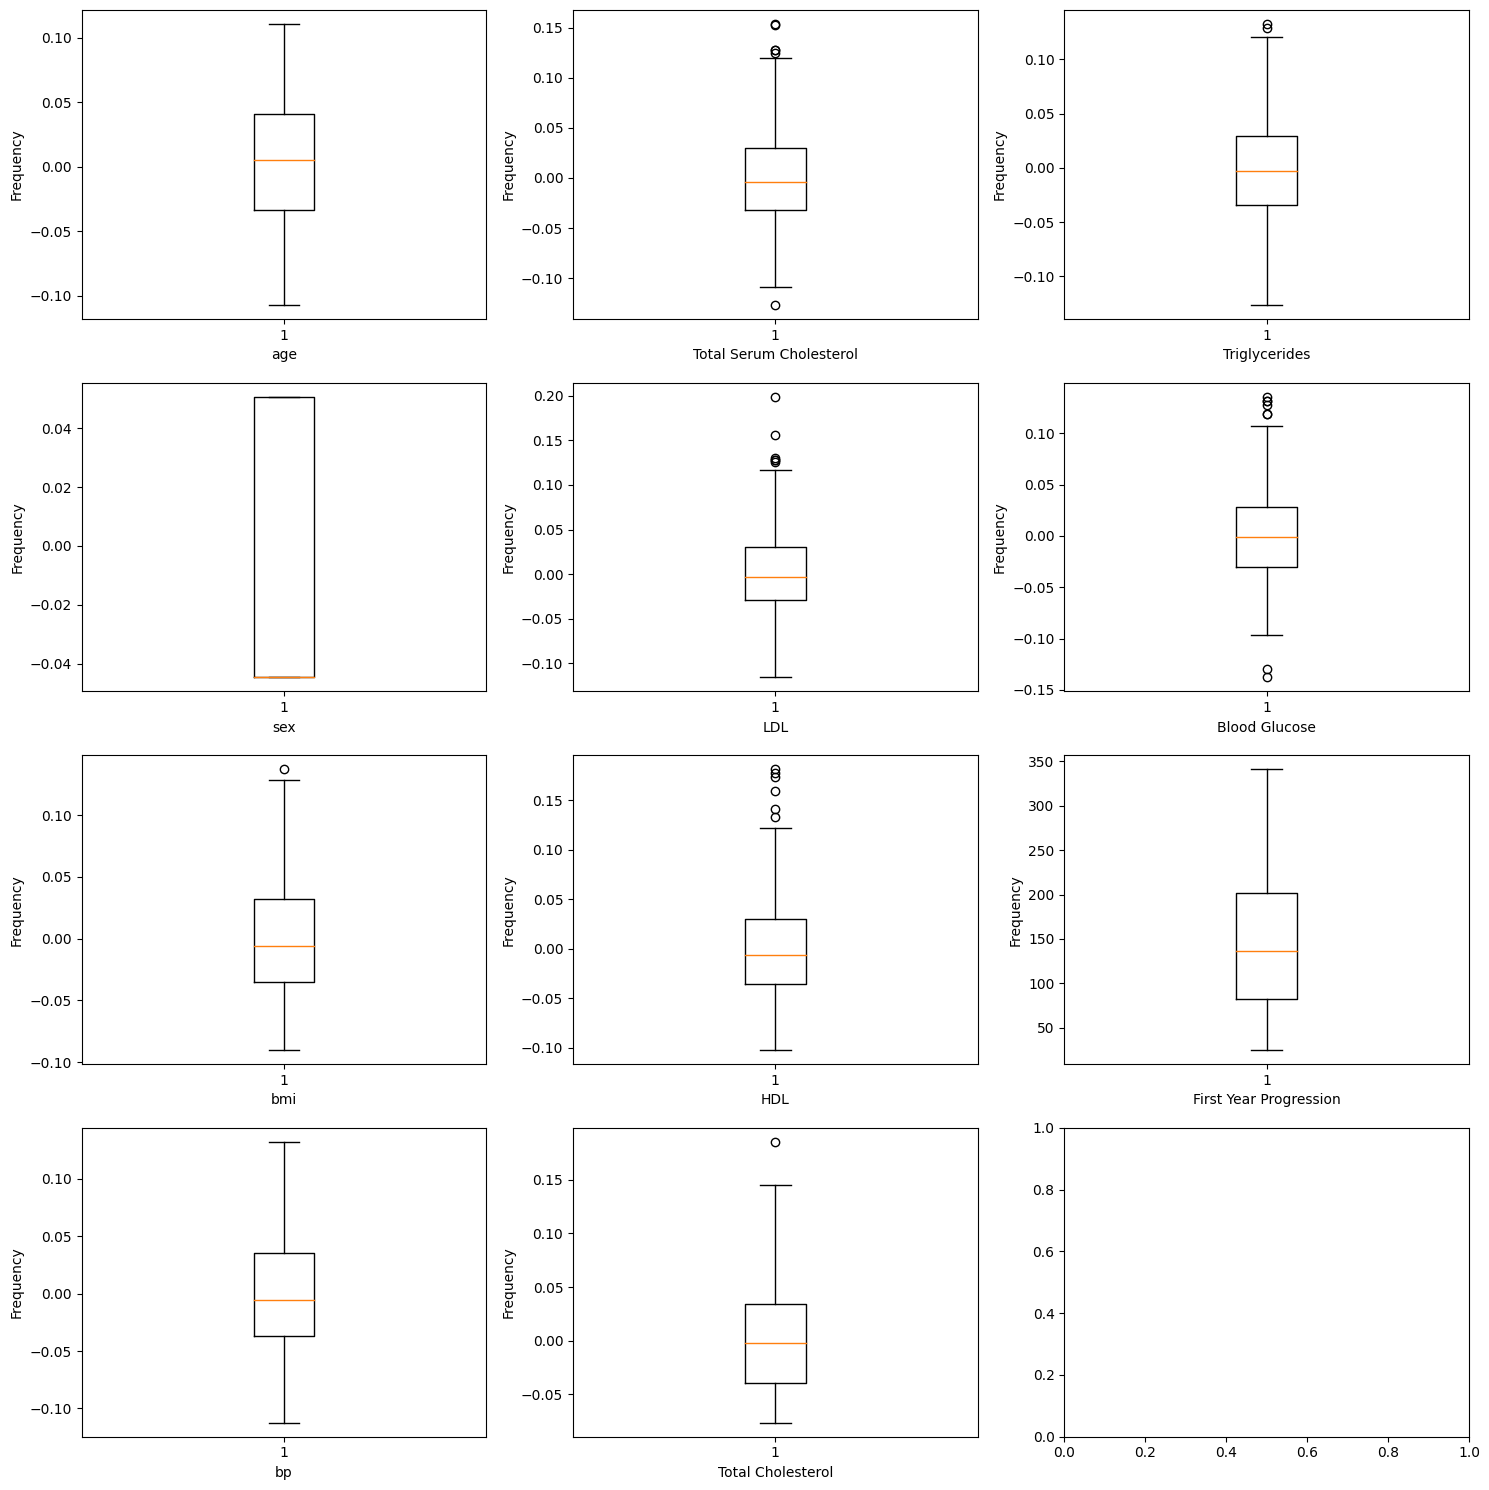

In [76]:
plot_whisker(df)

##### **Insights from Whisker**

- From whisker it can be seen that HDL, LDL, Blood Glucose, Triglycerides and Total serum cholesterol has Outliers.
- Interestingly blood glucose has outliers towards the lower side also.

> We will see if we need to remove outliers for better prediction. We will only do it based on the first round of iteration without removing them.

##### **Zscore Outlier Scatter Plot**

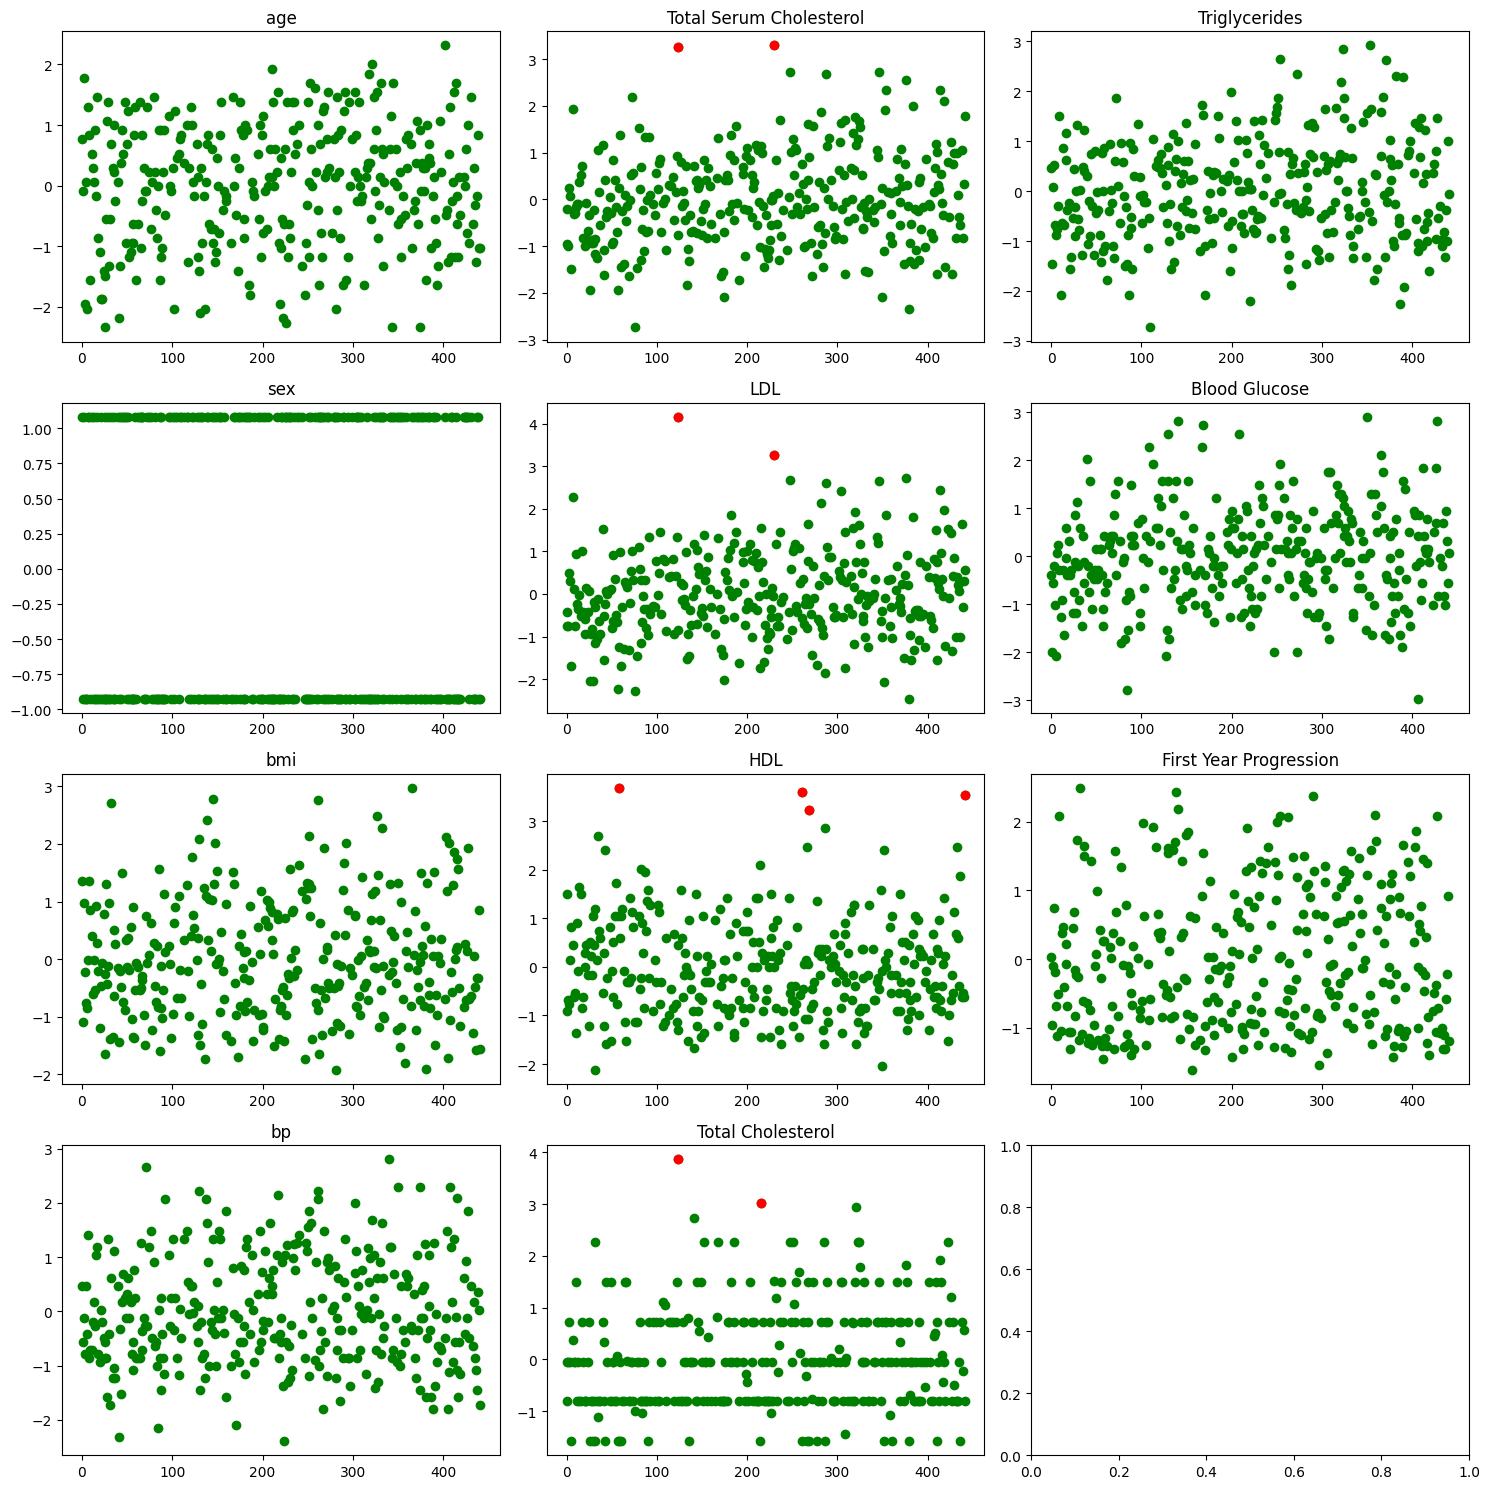

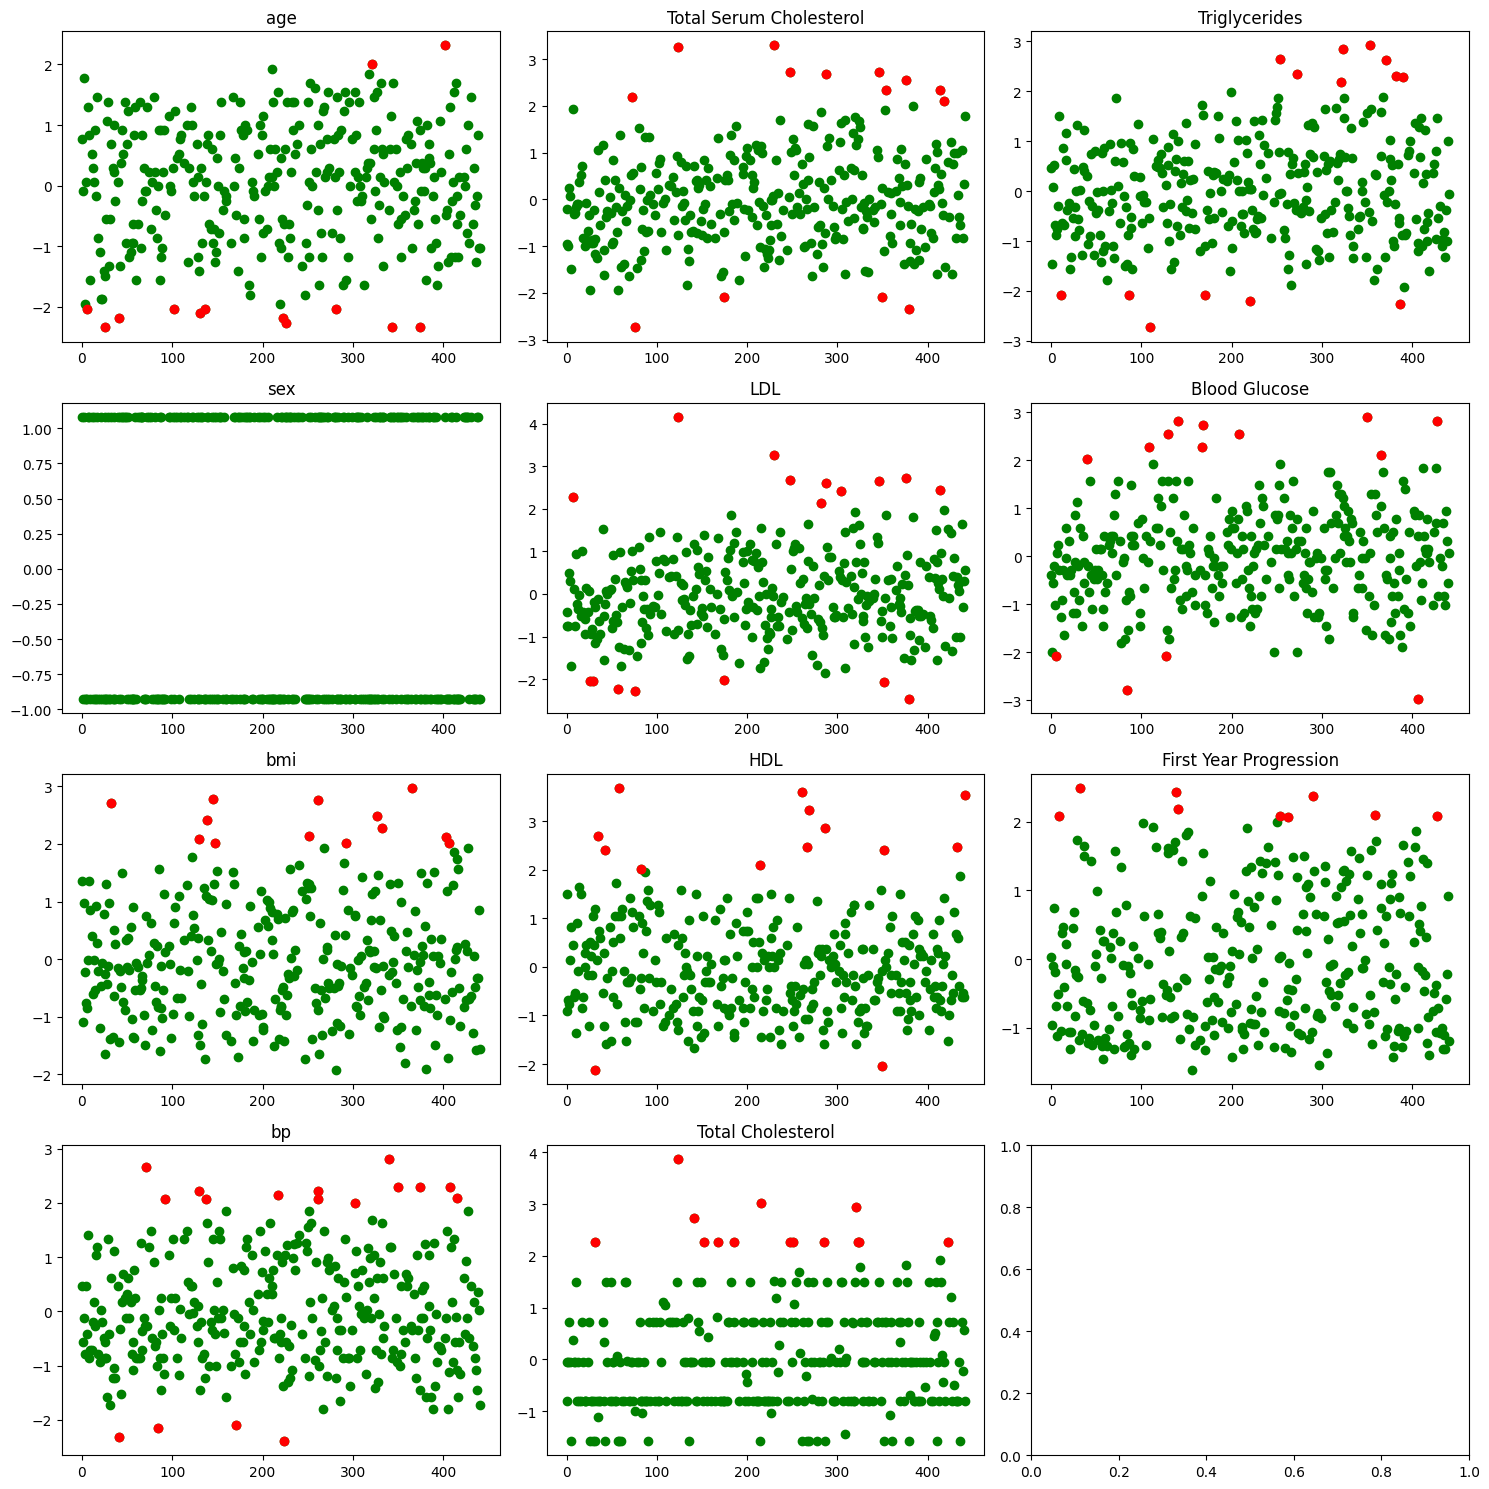

In [77]:
zscore_scatter_with_outliers(df, 3)
zscore_scatter_with_outliers(df,2)

##### **Insights based on Z-score Outliers**

- Too few outliers were detected outside zscore of 3 and outside zscore of 2 more number of outliers were detected. 
- Since there are many parameters removing outliers from each will not be the correct decision to make. Instead we can choose to cap the outliers for each parameter to the zscore we chose as threshold for outliers. 
- Creating 2 training datasets based on both values ie. zscore_outlier_threshold = 2 and z_score_outlier_thresold = 3.

##### **Training datasets based on outlier capping**

In [78]:
import numpy as np

def transform_outliers(df, z_threshold, exclude_columns_set):
    df_copy = df.copy()
    for i, col_name in enumerate(df_copy.columns):
        if col_name not in exclude_columns_set:
            z_scores = zscore(df_copy[col_name])
            upper_cap = df_copy[col_name].mean() + (z_threshold * df_copy[col_name].std())
            lower_cap = df_copy[col_name].mean() - (z_threshold * df_copy[col_name].std())
            df_copy[col_name] = np.where(z_scores > z_threshold, upper_cap, np.where(z_scores < (-1 * z_threshold), lower_cap, df_copy[col_name]))
    return df_copy

### Created two training sets where outliers are removed based on zscore of 2 and 3
df_train_z_3 = transform_outliers(df, 3, [target_column_name])
df_train_z_2 = transform_outliers(df, 2, [target_column_name])

##### **Plotting scatter zscore outlier for confirming**

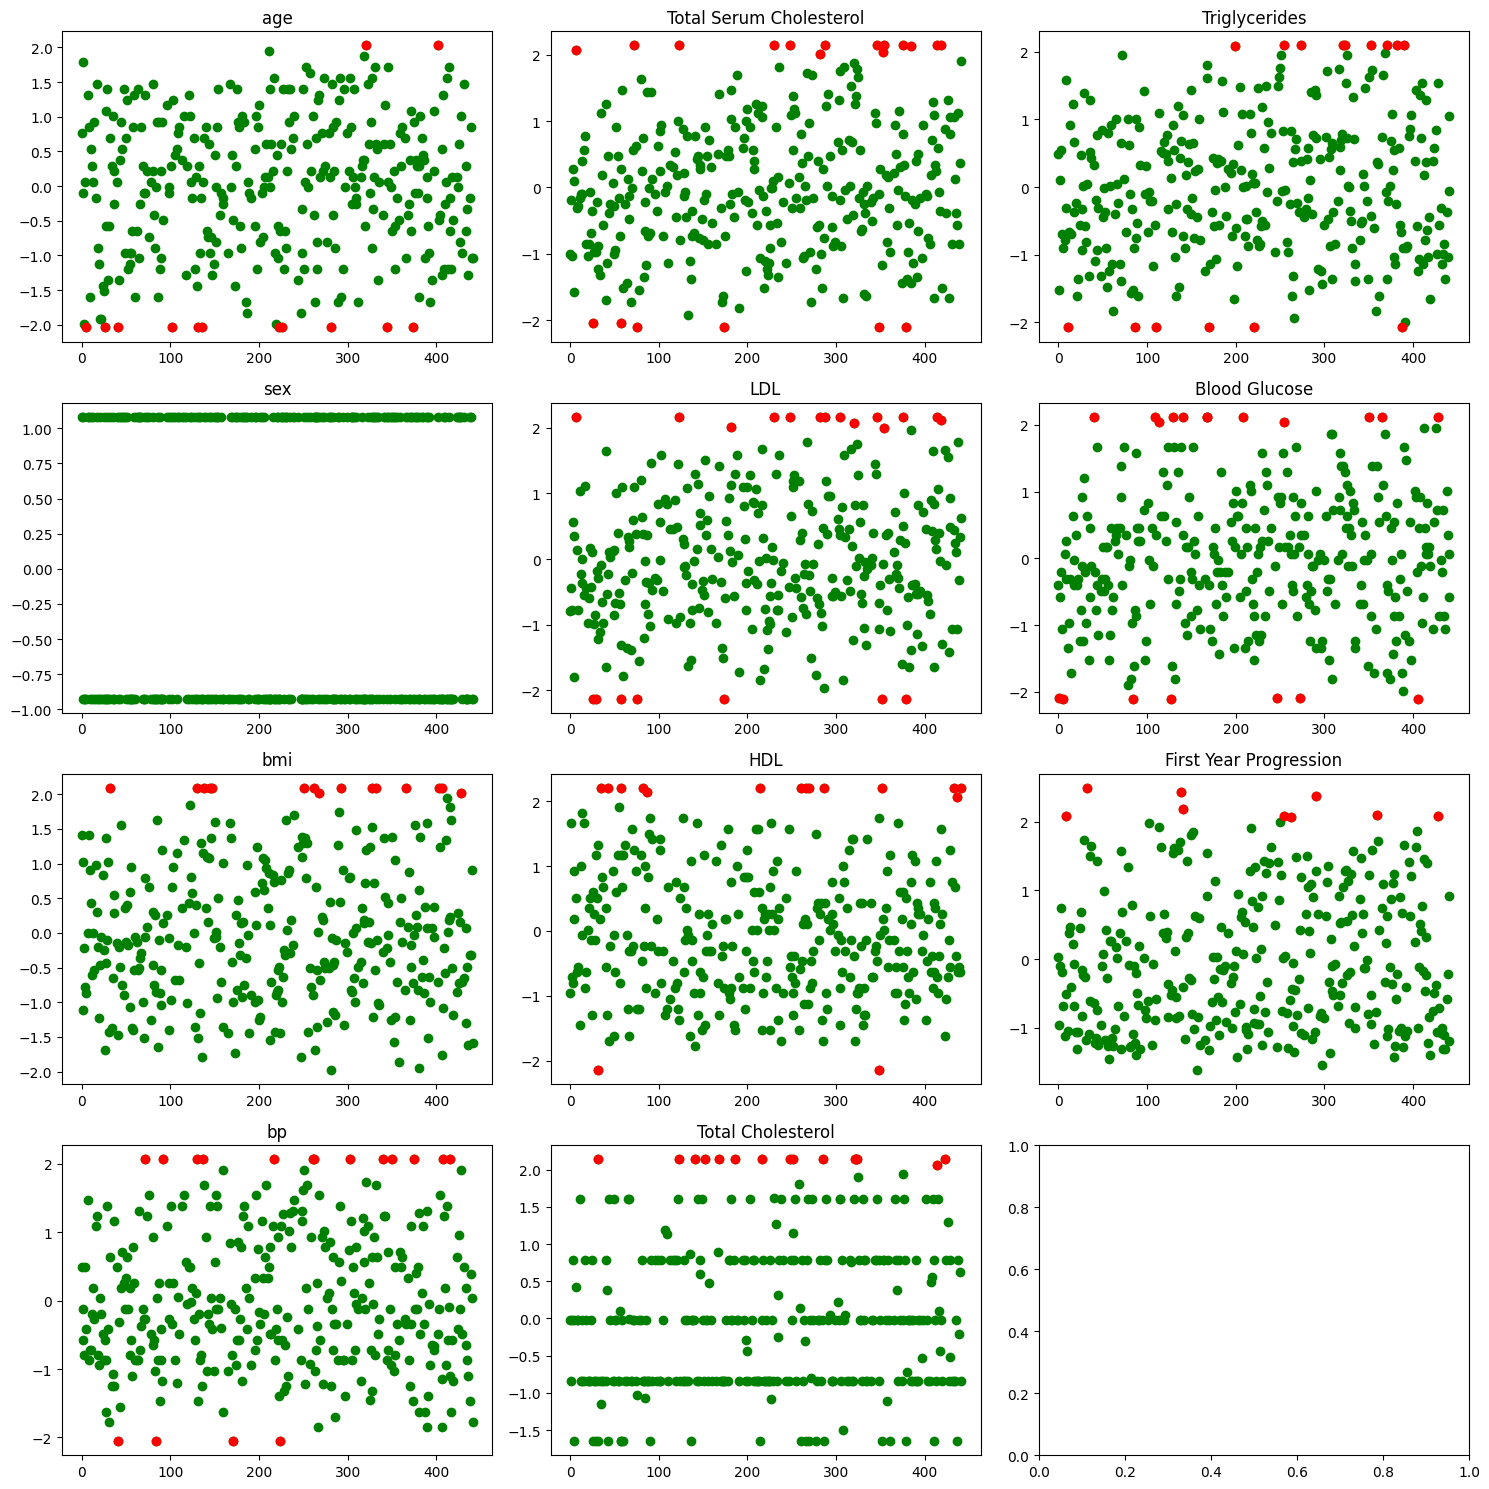

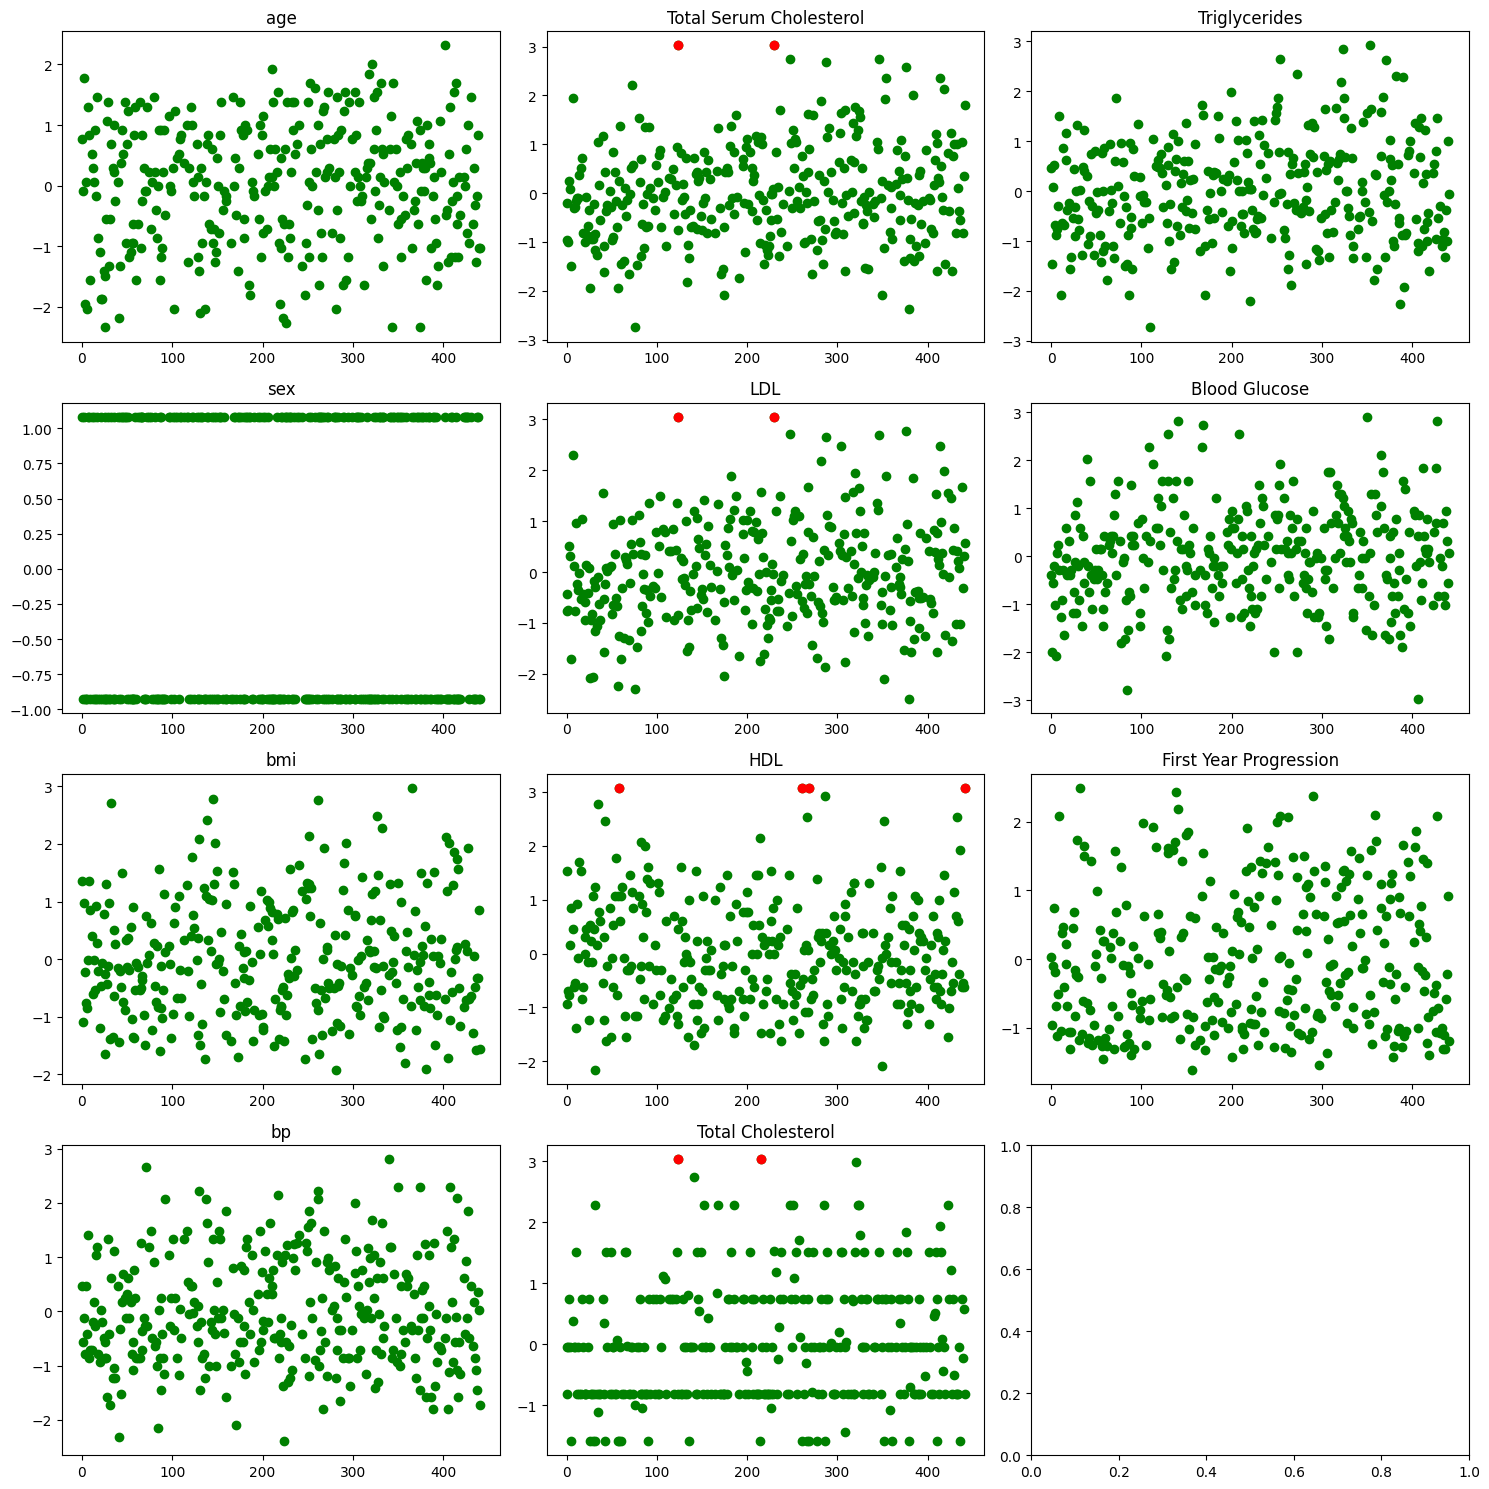

In [79]:
zscore_scatter_with_outliers(df_train_z_2, 2)
zscore_scatter_with_outliers(df_train_z_3, 3)

> As expected now the outliers are capped and are close to the remaining dataset.

> Now we can train the model using 3 different training set and choose one of them that performs well in validation set.

### **Part 2**

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lrm_bmi_train_with_outlier = LinearRegression()
lrm_bmi_train_with_outlier.fit(df[['bmi']], df[[target_column_name]])

lrm_bmi_train_with_z_2 = LinearRegression()
lrm_bmi_train_with_z_2.fit(df_train_z_2[['bmi']], df_train_z_2[[target_column_name]])

lrm_bmi_train_with_z_3 = LinearRegression()
lrm_bmi_train_with_z_3.fit(df_train_z_3[['bmi']], df_train_z_3[[target_column_name]])

intercept_lrm_bmi_t_w_o = lrm_bmi_train_with_outlier.intercept_
coeff_lrm_bmi_t_w_o = lrm_bmi_train_with_outlier.coef_
mse_lrm_bmi_t_w_o = mean_squared_error(df[[target_column_name]], lrm_bmi_train_with_outlier.predict(df[['bmi']]))
mae_lrm_bmi_t_w_o = mean_absolute_error(df[[target_column_name]], lrm_bmi_train_with_outlier.predict(df[['bmi']]))

intercept_lrm_bmi_z_2 = lrm_bmi_train_with_z_2.intercept_
coef_lrm_bmi_z_2 = lrm_bmi_train_with_z_2.coef_
mse_lrm_bmi_z_2 = mean_squared_error(df_train_z_2[[target_column_name]], lrm_bmi_train_with_z_2.predict(df_train_z_2[['bmi']]))
mae_lrm_bmi_z_2 = mean_absolute_error(df_train_z_2[[target_column_name]], lrm_bmi_train_with_z_2.predict(df_train_z_2[['bmi']]))

intercept_lrm_bmi_z_3 = lrm_bmi_train_with_z_3.intercept_
coef_lrm_bmi_z_3 = lrm_bmi_train_with_z_3.coef_
mse_lrm_bmi_z_3 = mean_squared_error(df_train_z_3[[target_column_name]], lrm_bmi_train_with_z_3.predict(df_train_z_3[['bmi']]))
mae_lrm_bmi_z_3 = mean_absolute_error(df_train_z_3[[target_column_name]], lrm_bmi_train_with_z_3.predict(df_train_z_3[['bmi']]))

model_data = {
    'Parameter': ['With Outliers', 'Z-Score 2', 'Z-Score 3', ],
    'Intercept': [intercept_lrm_bmi_t_w_o, intercept_lrm_bmi_z_2, intercept_lrm_bmi_z_3],
    'Coefficient': [coeff_lrm_bmi_t_w_o, coef_lrm_bmi_z_2, coef_lrm_bmi_z_3],
    'Mean Squared Error': [mse_lrm_bmi_t_w_o, mse_lrm_bmi_z_2, mse_lrm_bmi_z_3],
    'Mean Absolute Error': [mae_lrm_bmi_t_w_o, mae_lrm_bmi_z_2, mae_lrm_bmi_z_3],
}

model_df = pd.DataFrame(model_data)

display(model_df)

,Parameter,Intercept,Coefficient,Mean Squared Error,Mean Absolute Error
0,With Outliers,[150.00422852225765],[[928.7114374333679]],4062.595554,52.850341
1,Z-Score 2,[150.66620283154617],[[953.0709893850627]],4096.017202,52.921890
2,Z-Score 3,[150.00422852225765],[[928.7114374333679]],4062.595554,52.850341


#### **2.6 Polynomial Regression on BMI**

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.impute import SimpleImputer




def polynomial_regression(df_input, df_type_name, degree, col_name_lists, target_column):
    df_copy = df_input.copy()
    X = df_copy[col_name_lists]
    Y = df_copy[target_column]
    model = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('polynomial', PolynomialFeatures(degree=degree)),
                          ('linear', LinearRegression())])
    model.fit(X, Y)
    Y_pred = model.predict(X)
    df_copy['Y_Pred'] = Y_pred
    mse = mean_squared_error(df_copy[[target_column_name]], df_copy[['Y_Pred']])
    mae = mean_absolute_error(df_copy[[target_column_name]], df_copy[['Y_Pred']])
    r2 = r2_score(df_copy[[target_column_name]], df_copy[['Y_Pred']])
    mape = mean_absolute_percentage_error(df_copy[[target_column]], df_copy[['Y_Pred']]) * 100
    array = np.array([df_type_name, degree, mse, mae, mape, r2 * 100])
    return array, model

models = {}
poly_data = np.empty((1,6))
for i in range(0, 7):
    a,m = polynomial_regression(df, "With Outliers", i, ['bmi'], target_column_name)
    poly_data = np.vstack((poly_data, a))
    models[i] = m

models_z_score_2 = {}
for i in range(0, 7):
    a,m = polynomial_regression(df_train_z_2, "Z Score 2", i, ['bmi'], target_column_name)
    poly_data = np.vstack((poly_data, a))
    models_z_score_2[i] = m

poly_degree_df = pd.DataFrame(poly_data, columns=['Type', 'Degree', 'MSE', 'MAE', 'MAPE', 'R2 %'])
display(poly_degree_df)





,Type,Degree,MSE,MAE,MAPE,R2 %
0,3966.2855074523213,3999.799157823857,3966.2855074523213,52.07318094750936,52.12529700094002,52.07318094750936
1,With Outliers,0,5927.032286501377,65.58358126721762,63.50443304793178,0.0
2,With Outliers,1,4062.5955538144167,52.850340929084254,49.458382483260905,31.45649698809899
3,With Outliers,2,4061.883229801472,52.845620130494396,49.45209139277536,31.468515212034877
4,With Outliers,3,4061.6851572921414,52.81139521785915,49.41515239709797,31.47185706171203
5,With Outliers,4,4044.2010317501145,52.61951419193111,49.01238857183099,31.76684660617336
6,With Outliers,5,4040.727706192201,52.46281194925852,48.87384498477023,31.82544803417341
7,With Outliers,6,4013.4393541594127,52.49052411851975,49.149138231903045,32.28585301787725
8,Z Score 2,0,5927.032286501377,65.58358126721762,63.50443304793178,0.0
9,Z Score 2,1,4096.017202421837,52.92188951958288,49.546626989717566,30.892611944254412


##### **2.7 Running the model on Validation data**

In [82]:
def check_models_with_test_data(test_df, type, feature_names, target_column_name, m, degree):
    Y_predict = m.predict(test_df[feature_names])
    Y = test_df[[target_column_name]]
    mse = mean_squared_error(Y, Y_predict)
    mae = mean_absolute_error(Y, Y_predict)
    r2 = r2_score(Y, Y_predict)
    mape = mean_absolute_percentage_error(Y, Y_predict) * 100
    array = np.array([type, degree, mse, mae, mape, r2 * 100])
    return array

validation_poly_data = np.empty((0,6))
for i, (name,model) in enumerate(models.items()):
    result_array = check_models_with_test_data(validation_df, "With Outliers", ['bmi'], target_column_name, model, name)
    validation_poly_data = np.vstack((validation_poly_data, result_array))

for i, (name,model) in enumerate(models_z_score_2.items()):
    result_array = check_models_with_test_data(validation_df, "Z-Score-2 Capped", ['bmi'], target_column_name, model, name)
    validation_poly_data = np.vstack((validation_poly_data, result_array))


validation_poly_degree_df = pd.DataFrame(validation_poly_data, columns=['Type', 'Degree', 'MSE', 'MAE', 'MAPE', 'R2 %'])
display(validation_poly_degree_df)

,Type,Degree,MSE,MAE,MAPE,R2 %
0,With Outliers,0,5924.838016528926,66.53050505050506,48.84664980097633,-5.174141480908845
1,With Outliers,1,2851.636389499994,44.78468006646234,32.28558632946349,49.37947531313471
2,With Outliers,2,2847.2870101131434,44.57819321899048,32.104626967378636,49.45668286576495
3,With Outliers,3,2835.9911872773537,44.43970118356235,31.95259553388433,49.65719948170623
4,With Outliers,4,2772.2820133162413,43.97586022423889,31.182047544504282,50.78812621035684
5,With Outliers,5,2756.005256301525,43.75800525741295,31.164805749376274,51.07706135767063
6,With Outliers,6,2648.28227133003,42.93571582115472,30.270700376921905,52.98929464245086
7,Z-Score-2 Capped,0,5924.838016528926,66.53050505050506,48.84664980097633,-5.174141480908845
8,Z-Score-2 Capped,1,2799.1596853958213,44.302218252290984,32.14316840024744,50.31101002961249
9,Z-Score-2 Capped,2,2778.9025156608354,43.87294600152195,31.720167580161252,50.67060305642039


##### **2.8 : Best Model**

- The values for MAE, MAPE and R2 are very close to each other for some of the models. MAPE for degree 3, 4 and 5 is in the range of 30-32% for dataset with outliers. The model which we trained without outliers is actually performing worse than the one we trained with outliers. This shows that the real world data ( in this case  validation data ) also contains outliers which explains the reason for this. 
- Based on this above info outlier removal is not a good step for us. So we are rejecting all models trained without outliers. 
- Since MAPE for degree 1,2,3,4,5 and 6 are all in the range of ~30 - ~32 we apply Occam's Razor principle here and I'd select the model with degree 1. Reasons being 
-- The improvement we gain from going for a degree 1 and degree 6 model according to validation set is only ~1.8%.According to Occam's principle unless significant difference is there we should always prefer the solution with lesser variables. 
-- This also helps in improving performance of huge datasets.
-- The requirements from the client side is unknown. I'm assuming ~1-2 percentage difference in prediction would not affect the final treatment procedures selected or won't make a significant impact in the diagnosis procedure.


##### **2.9 : Running on Test Set**

In [105]:
validation_poly_data = np.empty((0,6))
result_array = check_models_with_test_data(test_df, "Selected model of degree 1", ['bmi'], target_column_name, models[1], 1)
validation_poly_data = np.vstack((validation_poly_data, result_array))
validation_poly_degree_df = pd.DataFrame(validation_poly_data, columns=['Type', 'Degree', 'MSE', 'MAE', 'MAPE', 'R2 %'])
display(validation_poly_degree_df)

,Type,Degree,MSE,MAE,MAPE,R2 %
0,Selected model of degree 1,1,3776.642176135618,51.43348440376026,44.87971435921775,36.38767771754369


##### **2.10 Plotting the graph**

(100,) (100, 1)


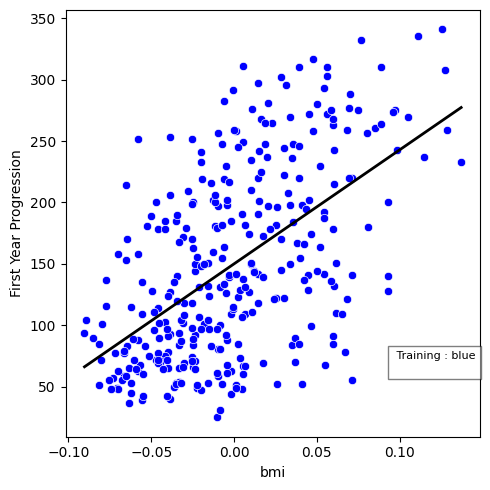

(100,) (100, 1)


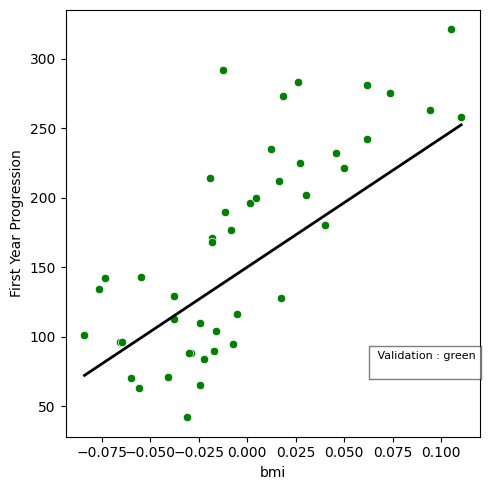

(100,) (100, 1)


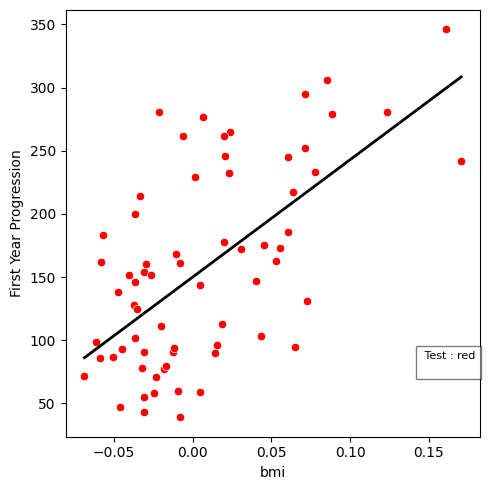

In [84]:
import sys

class DataSetInfo:
    def __init__(self, df, df_name, df_color):
        self.df = df
        self.df_name = df_name
        self.df_color = df_color
    
    def print(self):
        print(f'Dataset Name : {self.df_name} with {len(self.df)} entries and {len(self.df.columns)} columns')

    def title_for_plot(self):
        return f'{self.df_name} : {self.df_color}'

    def is_same_columns(self, datasetInfo):
        if list(self.df.columns) == list(datasetInfo.df.columns):
            return True
        else:
            return False

class ScatterPlotHelper:
    def plot_scatter_plot(self, target_column_name, datasetInfoList=[], feature_name_list=[], plots_in_a_row=4, figsize = (15,15), model_dict = {}):
        if len(datasetInfoList) == 0:
            raise Exception('Please pass atleast one dataframe')
        for i in range(1, len(datasetInfoList)):
            if datasetInfoList[0].is_same_columns(datasetInfoList[i]) == False:
                raise Exception('If you are passing multiple dataframes please make sure the column names and number are the same')
        feature_column_names = datasetInfoList[0].df.columns if len(feature_name_list) == 0 else feature_name_list 
        fig, axes = plt.subplots(int((len(feature_column_names)/plots_in_a_row)),plots_in_a_row, figsize=figsize)
        for i, col_name in enumerate(feature_column_names):
            minX = sys.maxsize-1
            maxX = -sys.maxsize-1
            for dataset in datasetInfoList:
                minX = min(dataset.df[col_name].min(), minX)
                maxX = max(dataset.df[col_name].max(), maxX)
                if col_name != target_column_name:
                    if col_name in dataset.df.columns and target_column_name in dataset.df.columns and not dataset.df.empty:
                        sns.scatterplot(data=dataset.df, x=col_name, y=target_column_name, ax=axes if len(feature_column_names) == 1 else axes[i%plots_in_a_row+1, i//plots_in_a_row], color=dataset.df_color)
                    else:
                        print('Some error')
            #Plotting the model prediction line
            feature_model = model_dict.get(col_name)
            if feature_model is not None:
                X_continuous = np.linspace(minX, maxX, 100)
                X_continuous = X_continuous.reshape(-1,1)
                predictions = feature_model.predict(X_continuous)
                pltAxes = axes if len(feature_column_names) == 1 else axes[i%plots_in_a_row+1, i//plots_in_a_row]
                print(f'{predictions.shape} {X_continuous.shape}')
                pltAxes.plot(X_continuous, predictions, linewidth=2, color='black')
        text = '' 
        for dataset in datasetInfoList:
            text = f'{text} {dataset.title_for_plot()}\n'
        plt.text(0.99, 0.2, text, fontsize=8, transform=plt.gca().transAxes,
                 bbox=dict(facecolor='white', alpha=0.5), 
                 ha='right', va='top')
        
        
        plt.tight_layout()
        plt.show()


training_dataset_info = DataSetInfo(df, 'Training', 'blue')
validation_dataset_info = DataSetInfo(validation_df, 'Validation', 'green')
test_dataset_info = DataSetInfo(test_df, 'Test', 'red')

model_dict = {}
model_dict['bmi'] = models[1]

scatter_plot_helper = ScatterPlotHelper()
scatter_plot_helper.plot_scatter_plot(target_column_name=target_column_name, 
                                      datasetInfoList=[training_dataset_info], 
                                                       feature_name_list=['bmi'], 
                                                       plots_in_a_row=1, figsize=(5,5), model_dict=model_dict)
scatter_plot_helper.plot_scatter_plot(target_column_name=target_column_name, 
                                      datasetInfoList=[validation_dataset_info], 
                                                       feature_name_list=['bmi'], 
                                                       plots_in_a_row=1, figsize=(5,5), model_dict=model_dict)
scatter_plot_helper.plot_scatter_plot(target_column_name=target_column_name, 
                                      datasetInfoList=[test_dataset_info], 
                                                       feature_name_list=['bmi'], 
                                                       plots_in_a_row=1, figsize=(5,5), model_dict=model_dict)

###### **All three datasets in one plot**

(100,) (100, 1)


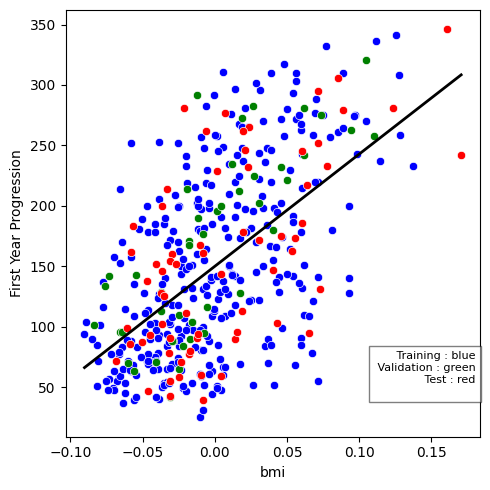

In [85]:
scatter_plot_helper.plot_scatter_plot(target_column_name=target_column_name, 
                                      datasetInfoList=[training_dataset_info,
                                                       validation_dataset_info,
                                                       test_dataset_info], 
                                                       feature_name_list=['bmi'], 
                                                       plots_in_a_row=1, figsize=(5,5), model_dict=model_dict)

#####  **2.11. Equation for the chosen best model**

In [106]:
def print_equation(model):
    equation = f"Degree 1 model - Equation : y = {model[-1].intercept_:.2f}"
    for ind, coeff in enumerate(model[-1].coef_[1:]):
        equation = equation + (f' + {coeff:.2f}x^{ind+1}')
    print(equation)

print_equation(models[1])

Degree 1 model - Equation : y = 150.00 + 928.71x^1


##### **2.12. Predicting diabetes progression for BMI value 0.2**


In [107]:
models[1].predict(np.array([[0.25]]))

array([382.18208788])

For a BMI value of **0.25** we will get diabetes progression of **382.18**

##### **2.13. Trainable Parameters in the selected model**

In [88]:
for degree, model in models.items():
    equation = f"Degree {degree} model - Equation : y = {model[-1].intercept_:.2f}"
    for ind, coeff in enumerate(model[-1].coef_[1:]):
        equation = equation + (f' + {coeff:.2f}x^{ind+1}')
    print(equation)

Degree 0 model - Equation : y = 149.13
Degree 1 model - Equation : y = 150.00 + 928.71x^1
Degree 2 model - Equation : y = 149.32 + 922.54x^1 + 315.27x^2
Degree 3 model - Equation : y = 149.16 + 935.85x^1 + 443.49x^2 + -2691.84x^3
Degree 4 model - Equation : y = 152.08 + 1058.76x^1 + -2806.38x^2 + -36719.98x^3 + 441579.46x^4
Degree 5 model - Equation : y = 153.14 + 999.65x^1 + -4739.87x^2 + -5821.34x^3 + 764943.02x^4 + -3366914.16x^5
Degree 6 model - Equation : y = 155.61 + 1273.84x^1 + -9498.68x^2 + -177754.64x^3 + 2450329.68x^4 + 16146766.88x^5 + -163144127.74x^6


##### **Explanation for Trainable parameters**

- For degree 0 there are no trainable parameters instead we have only the bias which is 149.13. This means that this model with degree 0 doesn't depend on any feature. ( in this particular case 'bmi')
- For degree 1 the bias is 150.00 and it has 1 trainable parameter whose coefficient is 928.71. In this particular case the coefficient means that the parameter 'bmi' which we chose to train the model decides the input with 928.71 times the value of the parameter.
- For degree 2 there are 2 trainable parameters whose coefficients are respectively 922.54 and 315.27. This means that the output depends on 922.54 times the 'bmi' value and 315.27 times the square of 'bmi' value. 

##### **2.14. Conclusion**
- From the models that we trained using 'bmi' we selected the model with degree 1.
- This provided a 44.87% MAPE which is large. 
- R-Squared value was 36.38 which is not good enough.
- This means that we can't use 'bmi' to predict diabetes progression with a decent accuracy. 

In [89]:
test_sorted = test_df.sort_values(by='bmi', ascending=True).reset_index(drop=True)
n = len(test_sorted)
split_size = int(0.33 * n)
split_1 = test_sorted.iloc[:split_size]
split_2 = test_sorted.iloc[split_size:split_size*2]
split_3 = test_sorted.iloc[split_size*2:]

validation_poly_data = np.empty((0,6))
result_array_1 = check_models_with_test_data(split_1, "Low value bmi", ['bmi'], target_column_name, models[1], 1)
result_array_2 = check_models_with_test_data(split_2, "Medium value bmi", ['bmi'], target_column_name, models[1], 1)
result_array_3 = check_models_with_test_data(split_3, "High value bmi", ['bmi'], target_column_name, models[1], 1)

validation_poly_data = np.vstack((validation_poly_data, result_array_1))
validation_poly_data = np.vstack((validation_poly_data, result_array_2))
validation_poly_data = np.vstack((validation_poly_data, result_array_3))

validation_poly_degree_df = pd.DataFrame(validation_poly_data, columns=['Type', 'Degree', 'MSE', 'MAE', 'MAPE', 'R2 %'])
display(validation_poly_degree_df)
print(f'Low value set range : {split_1["bmi"].min()} - {split_1["bmi"].max()}')
print(f'Medium value set range : {split_2["bmi"].min()} - {split_2["bmi"].max()}')
print(f'High value set range : {split_3["bmi"].min()} - {split_3["bmi"].max()}')


,Type,Degree,MSE,MAE,MAPE,R2 %
0,Low value bmi,1,2351.952921264819,39.753331934138714,41.24194297124841,-3.609034907128028
1,Medium value bmi,1,5337.375176577345,62.97451116430891,66.16475709992056,-1.7529875693859331
2,High value bmi,1,3646.5133760242948,51.56656116896044,27.99971567399442,13.104020992059462


Low value set range : -0.06871905442089347 - -0.029917819761184662
Medium value set range : -0.0266843835395423 - 0.01966153563733209
High value set range : 0.01966153563733209 - 0.17055522598064407


- We can also see that the model is better in predicting for high values of bmi. 
- For lower values and medium range the model performs badly. 

#### **Part 3**

##### **Multivariate Polynomial Models**

In [90]:

def display_validation_data_after_multivariate_polynomial_regression(df, 
                                                                     val_df, model_name, target_column_name, 
                                                                     selected_columns_for_regression, degree):
    multivariate_models = {}
    poly_data = np.empty((1,6))
    for i in range(0, degree):
        a,m = polynomial_regression(df, "Model 1", i, selected_columns_for_regression , target_column_name)
        poly_data = np.vstack((poly_data, a))
        multivariate_models[i] = m

    validation_poly_degree_df = pd.DataFrame(poly_data, columns=['Type', 'Degree', 'MSE', 'MAE', 'MAPE', 'R2 %'])
    print("TRAINING RESULTS")
    display(validation_poly_degree_df)
    validation_poly_data = np.empty((0,6))
    for i, (name,model) in enumerate(multivariate_models.items()):
        result_array = check_models_with_test_data(val_df, model_name, selected_columns_for_regression, target_column_name, model, name)
        validation_poly_data = np.vstack((validation_poly_data, result_array))
    validation_poly_degree_df = pd.DataFrame(validation_poly_data, columns=['Type', 'Degree', 'MSE', 'MAE', 'MAPE', 'R2 %'])
    print("VALIDATION RESULTS")
    display(validation_poly_degree_df)
    return multivariate_models

In [91]:
selected_columns_for_regression = ['bmi', 'LDL', 'HDL', 'Triglycerides', 'Total Serum Cholesterol', 'bp']
_ = display_validation_data_after_multivariate_polynomial_regression(df, validation_df, 'MV-Model-1', target_column_name=target_column_name,
                                                                 selected_columns_for_regression=selected_columns_for_regression,
                                                                 degree=6)

TRAINING RESULTS


,Type,Degree,MSE,MAE,MAPE,R2 %
0,0.0,0.0,0.0,0.0,0.0,0.0
1,Model 1,0,5927.032286501377,65.58358126721762,63.50443304793178,0.0
2,Model 1,1,3004.5517937496193,44.374110727451615,40.58301027289246,49.30765265793493
3,Model 1,2,24052.715151515153,118.50909090909092,101.37793432605918,-305.81380341548714
4,Model 1,3,5848.4,60.38787878787879,52.103294546886524,1.3266721472136922
5,Model 1,4,2881.951515151515,43.56363636363636,41.556768456292644,51.376146174957306
6,Model 1,5,5.11547642408633e-14,1.707256932136123e-07,1.5311433438477096e-07,100.0


VALIDATION RESULTS


,Type,Degree,MSE,MAE,MAPE,R2 %
0,MV-Model-1,0,5924.838016528926,66.53050505050506,48.84664980097633,-5.174141480908845
1,MV-Model-1,1,2310.2759909177903,39.40502894005575,31.12644115795213,58.98937772629851
2,MV-Model-1,2,20548.244444444445,114.6,76.37219781314391,-264.7600090255984
3,MV-Model-1,3,10294.022222222222,77.53333333333333,52.43474078077271,-82.73325727846657
4,MV-Model-1,4,8401676.422222223,806.4222222222222,372.3364870098008,-149041.47901469504
5,MV-Model-1,5,1736582759.9952695,11636.960462938148,4998.39308646598,-30826666.97380018


> Notes : After trying with some random combination of features found that model was performing very well in train and better than 'bmi' model in verification and test
>> So to further fine tune the system we first try to use Correlation Matrix to find features which are highly correlated.



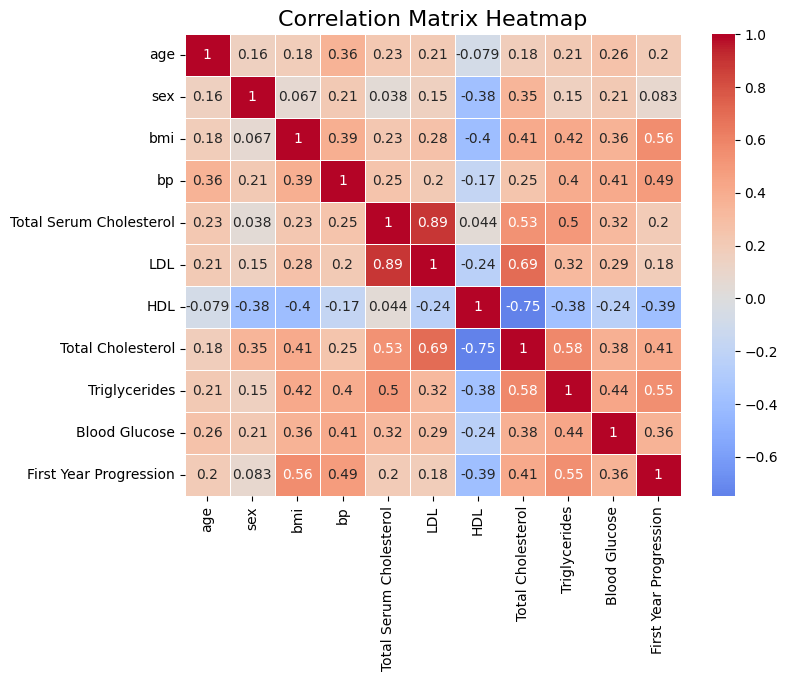

In [92]:
corr_matrix = df.corr()
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Add title and display the plot
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

- We understand that bmi, triglycerides, bp, and Total Cholesterol has highest correlation to first year progression.
- But all these features are mutually correlated as well. So we select only one of them which is 'bmi'
- Blood glucose has next highest correlation and HDL has inverse correlation. Though these have medium high values of mutual correlation we can try using these 3
- For this we need to create an inverse of HDL first.

In [93]:
df['Inv-HDL'] = 1 / df['HDL']
df['Inv-HDL'].fillna(df['Inv-HDL'].mean())
validation_df['Inv-HDL'] = 1 / validation_df['HDL']
validation_df['Inv-HDL'] = validation_df['Inv-HDL'].fillna(validation_df['Inv-HDL'].mean())
test_df['Inv-HDL'] = 1 / test_df['HDL']
test_df['Inv-HDL'].fillna(test_df['Inv-HDL'].mean())
selected_columns_for_regression_1 = ['bmi', 'Inv-HDL', 'Blood Glucose']
selected_columns_for_regression_2 = ['sex', 'bmi', 'LDL', 'Inv-HDL', 'Triglycerides', 'Total Serum Cholesterol', 'bp']
mv_models_1 = display_validation_data_after_multivariate_polynomial_regression(df, test_df, 'MV-Model-1-3features', target_column_name=target_column_name,
                                                                 selected_columns_for_regression=selected_columns_for_regression_1,
                                                                 degree=6)
mv_models_2 = display_validation_data_after_multivariate_polynomial_regression(df, test_df, 'MV-Model-2-7features', target_column_name=target_column_name,
                                                                 selected_columns_for_regression=selected_columns_for_regression_2,
                                                                 degree=6)

TRAINING RESULTS


,Type,Degree,MSE,MAE,MAPE,R2 %
0,0.0,5e-324,1e-323,1.5e-323,2e-323,2.5e-323
1,Model 1,0,5927.032286501377,65.58358126721762,63.50443304793178,0.0
2,Model 1,1,3856.63240690996,51.499022216230294,48.188899674869326,34.93147631921434
3,Model 1,2,3760.19934379475,50.666752649302374,47.243420132460486,36.55848050029217
4,Model 1,3,3726.8906570256245,50.49882058099126,46.92047432971928,37.12045966893926
5,Model 1,4,69946.02568713289,154.81584725300263,137.38921070579474,-1080.1188572303324
6,Model 1,5,6600.2717580678545,63.34486635830994,63.74898064890749,-11.358795414355338


VALIDATION RESULTS


,Type,Degree,MSE,MAE,MAPE,R2 %
0,MV-Model-1-3features,0,6006.944013815221,64.25183175033922,54.88797522537185,-1.178676908829801
1,MV-Model-1-3features,1,3331.923848415125,50.341947708707494,44.38436928412775,43.87834383535362
2,MV-Model-1-3features,2,3295.980131728506,50.08032249934329,43.645805468066236,44.48376610817218
3,MV-Model-1-3features,3,3288.253585708232,49.41414290962508,43.36229972025851,44.61390910627714
4,MV-Model-1-3features,4,120993.3791182899,203.84536396626393,136.79101118292394,-1937.9663911902708
5,MV-Model-1-3features,5,19531.251757117265,82.81043422075112,67.89916306343306,-228.97696509464586


TRAINING RESULTS


,Type,Degree,MSE,MAE,MAPE,R2 %
0,0.0,5e-324,1e-323,1.5e-323,2e-323,2.5e-323
1,Model 1,0,5927.032286501377,65.58358126721762,63.50443304793178,0.0
2,Model 1,1,2966.8444410507877,44.073032638433716,40.31886744622832,49.94384545858339
3,Model 1,2,3041.4529081652704,44.831752649943034,41.7272168714207,48.68506258870767
4,Model 1,3,2545.627310159481,40.1791097193787,36.20830099550513,57.050557730939566
5,Model 1,4,2377.0297672661904,37.63878162655119,32.851532608059905,59.89511019402074
6,Model 1,5,3352.8506021820544,45.56213513824146,42.419013945550844,43.4312073882563


VALIDATION RESULTS


,Type,Degree,MSE,MAE,MAPE,R2 %
0,MV-Model-2-7features,0,6006.944013815221,64.25183175033922,54.88797522537185,-1.178676908829801
1,MV-Model-2-7features,1,3204.123906214488,46.61821498577743,37.14314769267148,46.03095738246618
2,MV-Model-2-7features,2,3723.765129022666,48.0675454780237,38.85603984268154,37.278318558115856
3,MV-Model-2-7features,3,18531.27121639594,74.4051527285031,59.505398489697924,-212.13367376180406
4,MV-Model-2-7features,4,15699787.138004875,704.1522617282671,492.11843929879944,-264341.2344646933
5,MV-Model-2-7features,5,1001306248.2922729,4440.857383282767,3139.0397644955983,-16865521.046201546


- Here we can see that Model-2 with 7 features of degree 1 is giving us the best result for the test dataset. Its able to give MAPE of ~37 which is a good improvement from the univariate regression we did on just 'bmi'

So we select the model with 7 features of degree 1 

##### **C11. Equation for the model**

In [94]:
# Get the feature names



def print_equation_for_multivariate_poly_model(model, selected_columns_for_regression):
    feature_names = model[1].get_feature_names_out(input_features=selected_columns_for_regression)
    coefficients = model[-1].coef_
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    equation = f'Equation for selected model : Y = {model[-1].intercept_}'
    for index, row in coefficients_df.iterrows():
        if index != 0:
            equation = f'{equation} + ( {row["Coefficient"]} * ({row["Feature"]}) )'
    print(equation)
    return coefficients_df

print_equation_for_multivariate_poly_model(mv_models_2[1], selected_columns_for_regression_2)

Equation for selected model : Y = 150.50801269269851 + ( -137.2030171495913 * (sex) ) + ( 492.6578336677999 * (bmi) ) + ( 455.585236428433 * (LDL) ) + ( -0.00905833698956826 * (Inv-HDL) ) + ( 756.6834222278923 * (Triglycerides) ) + ( -669.5971423922273 * (Total Serum Cholesterol) ) + ( 405.96747303371177 * (bp) )


,Feature,Coefficient
0,1,0.000000
1,sex,-137.203017
2,bmi,492.657834
3,LDL,455.585236
4,Inv-HDL,-0.009058
5,Triglycerides,756.683422
6,Total Serum Cholesterol,-669.597142
7,bp,405.967473


> Trying out for degree 2

In [95]:
print_equation_for_multivariate_poly_model(mv_models_2[2], selected_columns_for_regression_2)

Equation for selected model : Y = -10796800714.625319 + ( -166.24003285982675 * (sex) ) + ( 551.5505283959618 * (bmi) ) + ( 344.18122756364613 * (LDL) ) + ( 0.010628276086018342 * (Inv-HDL) ) + ( 795.9526310972577 * (Triglycerides) ) + ( -644.4580821354235 * (Total Serum Cholesterol) ) + ( 472.81942431087646 * (bp) ) + ( -1.0032522292742054 * (sex^2) ) + ( 2326.894766344061 * (sex bmi) ) + ( -7717.6260982427 * (sex LDL) ) + ( 0.7672652164229281 * (sex Inv-HDL) ) + ( -1499.259592844947 * (sex Triglycerides) ) + ( 4690.870314568348 * (sex Total Serum Cholesterol) ) + ( 5764.221640113124 * (sex bp) ) + ( -784.3715747329202 * (bmi^2) ) + ( -5819.106625288117 * (bmi LDL) ) + ( 0.20241772505239708 * (bmi Inv-HDL) ) + ( -4570.001975565499 * (bmi Triglycerides) ) + ( 2779.795705595263 * (bmi Total Serum Cholesterol) ) + ( 3812.465309880639 * (bmi bp) ) + ( 8468.214743273413 * (LDL^2) ) + ( -1.1129382756587778 * (LDL Inv-HDL) ) + ( 15946.492235479382 * (LDL Triglycerides) ) + ( -23400.652909964

,Feature,Coefficient
0,1,1.079680e+10
1,sex,-1.662400e+02
2,bmi,5.515505e+02
3,LDL,3.441812e+02
4,Inv-HDL,1.062828e-02
5,Triglycerides,7.959526e+02
6,Total Serum Cholesterol,-6.444581e+02
7,bp,4.728194e+02
8,sex^2,-1.003252e+00
9,sex bmi,2.326895e+03


##### **C12. Prediction**

In [96]:
print(selected_columns_for_regression_2)

['sex', 'bmi', 'LDL', 'Inv-HDL', 'Triglycerides', 'Total Serum Cholesterol', 'bp']


In [97]:
print(df['sex'].unique())
# Interesting point. Need to find out why? When trained with 7 features 
# I used 7 values initially but gave value error 
# >> ValueError: X has 7 features, but LinearRegression is expecting 8 features as input. 
# It got solved when I added leading zero in values which I assume is 
# treated as intercept and ignored. I don't understand the reason for having that though. Because 
# whatever value im using the prediction remains the same.
values = [[0, 0.05068012, -0.035, 0.4, 1/0.1, 0.04, 0.001, 0.1]]
mv_models_2[1][-1].predict(values)

[ 0.05068012 -0.04464164]


array([378.64952139])

> So for the given values above the predicted disease progression after 1 year is **378.64**

##### **C13. Trainable Parameters**

In [98]:
print("Equation for model with 7 features and degree 1")
coefficients_df_1 = print_equation_for_multivariate_poly_model(mv_models_2[1], selected_columns_for_regression_2)

print("Equation for model with 7 features and degree 2")
coefficients_df_2 = print_equation_for_multivariate_poly_model(mv_models_2[2], selected_columns_for_regression_2)

Equation for model with 7 features and degree 1
Equation for selected model : Y = 150.50801269269851 + ( -137.2030171495913 * (sex) ) + ( 492.6578336677999 * (bmi) ) + ( 455.585236428433 * (LDL) ) + ( -0.00905833698956826 * (Inv-HDL) ) + ( 756.6834222278923 * (Triglycerides) ) + ( -669.5971423922273 * (Total Serum Cholesterol) ) + ( 405.96747303371177 * (bp) )
Equation for model with 7 features and degree 2
Equation for selected model : Y = -10796800714.625319 + ( -166.24003285982675 * (sex) ) + ( 551.5505283959618 * (bmi) ) + ( 344.18122756364613 * (LDL) ) + ( 0.010628276086018342 * (Inv-HDL) ) + ( 795.9526310972577 * (Triglycerides) ) + ( -644.4580821354235 * (Total Serum Cholesterol) ) + ( 472.81942431087646 * (bp) ) + ( -1.0032522292742054 * (sex^2) ) + ( 2326.894766344061 * (sex bmi) ) + ( -7717.6260982427 * (sex LDL) ) + ( 0.7672652164229281 * (sex Inv-HDL) ) + ( -1499.259592844947 * (sex Triglycerides) ) + ( 4690.870314568348 * (sex Total Serum Cholesterol) ) + ( 5764.2216401131

In [99]:
print(f'The number of trainable parameters for model with 7 features and degree 1 is {len(coefficients_df_1)}')
print(f'The number of trainable parameters for model with 7 features and degree 2 is {len(coefficients_df_2)}')
display(coefficients_df_2)

The number of trainable parameters for model with 7 features and degree 1 is 8
The number of trainable parameters for model with 7 features and degree 2 is 36


,Feature,Coefficient
0,1,1.079680e+10
1,sex,-1.662400e+02
2,bmi,5.515505e+02
3,LDL,3.441812e+02
4,Inv-HDL,1.062828e-02
5,Triglycerides,7.959526e+02
6,Total Serum Cholesterol,-6.444581e+02
7,bp,4.728194e+02
8,sex^2,-1.003252e+00
9,sex bmi,2.326895e+03


**Explanation**
- There are 8 parameters for degree 1
- There are a total of 35 parameters for degree 2
- So if you look at row 32 it means triglycerides and bp together how it contributes to the prediction. It has a weight of ~819


##### **Conclusion**
- We achieved an improvemnet from 44.98 MAPE in univariate regression model to 37.14 MAPE using multivariate regression model with 7 features and degree 1. 
- Though we tried to get some insights from correlation matrix and heat map and remove some features using correlation logic it didn't seem to improve the validation results.

##### **Part C - Decision Trees**

In [100]:
from sklearn import tree


dt_model = tree.DecisionTreeRegressor(max_depth=2)
dt_model = dt_model.fit(df[selected_columns_for_regression_2], df[target_column_name])

dt_model2 = tree.DecisionTreeRegressor(max_depth=3)
dt_model2 = dt_model2.fit(df[selected_columns_for_regression_2], df[target_column_name])

dt_model3 = tree.DecisionTreeRegressor(max_depth=4)
dt_model3 = dt_model3.fit(df[selected_columns_for_regression_2], df[target_column_name])

validation_decision_tree = np.empty((0,6))
result_array1 = check_models_with_test_data(validation_df, "Decision Tree 1", selected_columns_for_regression_2, target_column_name, dt_model, "2")
result_array2 = check_models_with_test_data(validation_df, "Decision Tree 2", selected_columns_for_regression_2, target_column_name, dt_model2, "3")
result_array3 = check_models_with_test_data(validation_df, "Decision Tree 3", selected_columns_for_regression_2, target_column_name, dt_model3, "4")

validation_decision_tree = np.vstack((validation_decision_tree, result_array1))
validation_decision_tree = np.vstack((validation_decision_tree, result_array2))
validation_decision_tree = np.vstack((validation_decision_tree, result_array3))

validation_decision_tree_df = pd.DataFrame(validation_decision_tree, columns=['Type', 'Depth', 'MSE', 'MAE', 'MAPE', 'R2 %'])
display(validation_decision_tree_df)


,Type,Depth,MSE,MAE,MAPE,R2 %
0,Decision Tree 1,2,3610.7049989254156,48.49716716032505,35.50303910891815,35.90494839801794
1,Decision Tree 2,3,3602.9467021248206,46.95754308900976,33.49003136468157,36.04266899106712
2,Decision Tree 3,4,4024.923219266133,47.83358264225734,33.827162285249074,28.55199704499386


> So we can select the decision tree with depth 3 since that provides the least MAPE value of 33.49 and R2 of highest value ie 36.04%.

##### **Prediction using Selected Decision Tree**


In [101]:
#Note that this is the same as the one used for predicting using our multivariate 7 feature 1 degree model.
values = [[0.05068012, -0.035, 0.4, 1/0.1, 0.04, 0.001, 0.1]]
dt_model2.predict(values)


array([264.51851852])

> So Decision tree is predicting **201.24** progression in disease after 1 year wherein **377.61** was predicted by our multivariate model.

##### **Conclusion of decision Tree**

- Decision tree and Multivariate polynomial regression model performs in similar manner on test set. Their MAPE, R2 values are identical with decision tree performing slightly better. ie MAPE of 33.49 for Decision Tree and MAPE of 37.14 for MultiVariate Polynomial Regression model.
- Decision tree will be a good option in cases where classification based on some ranges are important. After doctors feedback if we can get an idea on this maybe we can fine tune decision trees better.

##### **KNN**

In [102]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model = knn_model.fit(df[selected_columns_for_regression_2], df[target_column_name])

knn_model_2 = KNeighborsClassifier(n_neighbors=10)
knn_model_2 = knn_model_2.fit(df[selected_columns_for_regression_2], df[target_column_name])

knn_model_3 = KNeighborsClassifier(n_neighbors=10)
knn_model_3 = knn_model_3.fit(df[['bmi']], df[target_column_name])

knn_model_4 = KNeighborsClassifier(n_neighbors=50)
knn_model_4 = knn_model_4.fit(df[['bmi']], df[target_column_name])

validation_knn = np.empty((0,6))
result_array1 = check_models_with_test_data(validation_df, "7F kNN-3", selected_columns_for_regression_2, target_column_name, knn_model, "3")
result_array2 = check_models_with_test_data(validation_df, "7F kNN-10", selected_columns_for_regression_2, target_column_name, knn_model_2, "10")
result_array3 = check_models_with_test_data(validation_df, "1F kNN-10", ['bmi'], target_column_name, knn_model_3, "10")
result_array4 = check_models_with_test_data(validation_df, "1F kNN-100", ['bmi'], target_column_name, knn_model_4, "50")

validation_knn = np.vstack((validation_knn, result_array1))
validation_knn = np.vstack((validation_knn, result_array2))
validation_knn = np.vstack((validation_knn, result_array3))
validation_knn = np.vstack((validation_knn, result_array4))

validation_knn_df = pd.DataFrame(validation_knn, columns=['Type', 'Neighbors', 'MSE', 'MAE', 'MAPE', 'R2 %'])
display(validation_knn_df)


,Type,Neighbors,MSE,MAE,MAPE,R2 %
0,7F kNN-3,3,11066.111111111111,83.57777777777778,45.355477126110884,-96.43891232073068
1,7F kNN-10,10,14763.533333333333,101.35555555555555,68.92312153329931,-162.07331562927516
2,1F kNN-10,10,13647.888888888889,99.88888888888889,55.93435529392122,-142.26907012668977
3,1F kNN-100,50,9478.31111111111,77.55555555555556,43.24666737504343,-68.25324692743075


> Out of these 4 kNN models all of them have really bad R2 values which indicates that this model is worse than a simple linear regression model based on mean. 

> Out of these 4 the 7 feature 3 neighbor knn model is better.

##### **Prediction**

In [103]:
#Note that this is the same as the one used for predicting using our multivariate 7 feature 1 degree model.
values = [[0.05068012, -0.035, 0.4, 1/0.1, 0.04, 0.001, 0.1]]
knn_model.predict(values)

array([52.])

> Based on the above values which we used for decision trees and linear regression which gave **201.24** and **377.61** respectively knn model is predicting **52**

##### **Conclusion**

- Out of all the various models we created in this analysis Multivariate Polynomial regression and decision tree seems to suit better for the data. The model even though very primitive with MAPE values close to ~37 and ~33 respectively, can be a good starting point to refine the model further.

- kNN was worse performing out of the three models we tried.